In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

In [32]:
# Load Train data from our github repo
url_train = 'https://raw.githubusercontent.com/tjayada/iANNwTF_Project/main/data/cleaned%20data%20(1)/data_without_columns_train.csv'
dataDF_train = pd.read_csv(url_train)

# Load Train label data from our github repo
url_train_labels = 'https://raw.githubusercontent.com/tjayada/iANNwTF_Project/main/data/cleaned%20data%20(1)/data_without_columns_train_labels.csv'
dataDF_train_labels = pd.read_csv(url_train_labels)

In [33]:
# drop indexes 
dataDF_train = dataDF_train.drop("Unnamed: 0", axis = 1)
dataDF_train_labels = dataDF_train_labels.drop("Unnamed: 0", axis = 1)

In [34]:
X_train, X_valid, y_train, y_valid = train_test_split(dataDF_train, dataDF_train_labels, test_size=0.25, random_state=1)

In [35]:
dnn_model = keras.Sequential([
      layers.Dense(units=1, input_shape=(78,)),
      layers.Dense(160, kernel_initializer='normal', activation='relu'),
      layers.Dense(320, kernel_initializer='normal', activation='relu'),
      layers.Dense(160, kernel_initializer='normal', activation='relu'),
      layers.Dense(1, kernel_initializer='normal', activation='linear')
  ])

dnn_model.compile(loss='mse',
                metrics=[tf.keras.metrics.RootMeanSquaredError()],
                optimizer=tf.keras.optimizers.Adam(0.01))

In [36]:
history = dnn_model.fit(
    X_train, y_train,
    batch_size = 64,
    epochs=100,
    verbose=0,
    validation_split = 0.1)

In [37]:
# Calculate R squared
from sklearn.metrics import mean_squared_error

y_pred = dnn_model.predict(X_train).astype(np.int64)
y_true = y_train.astype(np.int64)

print(np.sqrt(mean_squared_error(y_true, y_pred))) 

36.0828811236129


In [38]:
y_pred = dnn_model.predict(X_valid).astype(np.int64)
y_true = y_valid.astype(np.int64)

print(np.sqrt(mean_squared_error(y_true, y_pred))) 

35.19461339884532


In [39]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

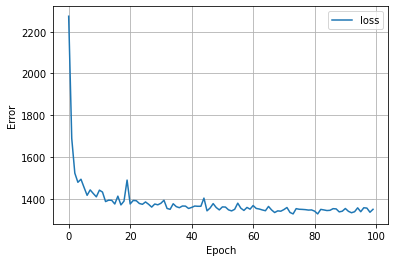

In [40]:
plot_loss(history)